# Description

See description in notebook `10_00-spectral_clustering...`.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
INITIAL_RANDOM_STATE = 100000

In [6]:
CLUSTERING_METHOD_NAME = "DeltaSpectralClustering"

In [7]:
# output dir for this notebook
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering')

# Load data

In [8]:
INPUT_SUBSET = "pca"

In [9]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
DR_OPTIONS = {
    "n_components": 50,
    "svd_solver": "full",
    "random_state": 0,
}

In [11]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/pca/pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

'pca-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-n_components_50-random_state_0-svd_solver_full'

In [12]:
data = pd.read_pickle(input_filepath)

In [13]:
data.shape

(3749, 50)

In [14]:
data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
100001_raw-Food_weight,-0.547515,-0.007250,0.245361,0.132424,1.201447,-0.113158,0.048859,1.031679,0.711208,0.126100,...,0.113685,-0.109753,0.178202,-0.487868,1.805920,-0.342611,-0.663712,-1.313987,-1.481707,0.396410
100002_raw-Energy,-1.570593,-0.618992,-1.223395,1.627321,-0.563860,0.224922,-1.500327,2.045633,-1.665998,-0.180432,...,0.697880,1.412676,2.103988,0.385625,2.386495,-2.939998,-0.978275,-1.893307,-0.259497,0.423264
100003_raw-Protein,-0.601212,-0.948824,-1.022209,2.438433,-2.062235,0.356202,-1.538038,2.314675,-1.108991,0.318034,...,0.171992,1.351979,0.054404,-0.725132,2.226520,-3.481674,-0.445294,-0.477452,0.237157,1.440867
100004_raw-Fat,-1.648214,-0.342042,-0.270189,1.683268,-1.222401,0.018349,-0.032824,1.671161,-0.908965,0.224100,...,-0.358812,0.696836,1.072624,0.627951,1.802000,0.174704,0.826319,-0.826992,0.596113,0.620050
100005_raw-Carbohydrate,-1.867586,-0.006412,-0.303220,0.770958,-0.116822,0.460946,-2.407732,1.534273,-1.930577,0.064621,...,1.332852,1.978032,2.158456,0.831123,1.093202,-3.539033,-0.831862,-0.842298,-0.723072,0.359438


In [15]:
traits = data.index.tolist()

In [16]:
len(traits)

3749

# Ensemble (coassociation matrix)

In [17]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "ensemble_coassoc_matrix.npy").resolve()
display(input_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/clustering/consensus_clustering/ensemble_coassoc_matrix.npy')

In [18]:
coassoc_matrix = np.load(input_file)

In [19]:
coassoc_matrix = pd.DataFrame(
    data=coassoc_matrix,
    index=traits,
    columns=traits,
)

In [20]:
coassoc_matrix.shape

(3749, 3749)

In [21]:
coassoc_matrix.head()

,100001_raw-Food_weight,100002_raw-Energy,100003_raw-Protein,100004_raw-Fat,100005_raw-Carbohydrate,100006_raw-Saturated_fat,100007_raw-Polyunsaturated_fat,100008_raw-Total_sugars,100009_raw-Englyst_dietary_fibre,100010-Portion_size,...,visual impairment,vitiligo,vitreous body disease,vocal cord polyp,voice disorders,wellbeing measurement AND family relationship,wheezing,whooping cough,worry measurement,wrist fracture
100001_raw-Food_weight,0.000000,0.056159,0.053895,0.076313,0.057518,0.075634,0.074728,0.057971,0.055480,0.567482,...,0.604223,0.602355,0.594564,0.603261,0.582428,0.548731,0.690641,0.599864,0.661714,0.667572
100002_raw-Energy,0.056159,0.000000,0.027400,0.044837,0.021966,0.045743,0.067482,0.031250,0.048007,0.561368,...,0.606040,0.604393,0.594337,0.606431,0.585824,0.571170,0.687644,0.601223,0.659886,0.665308
100003_raw-Protein,0.053895,0.027400,0.000000,0.046875,0.018116,0.047781,0.064764,0.032382,0.050951,0.558424,...,0.602634,0.601676,0.592525,0.603487,0.581975,0.571850,0.691102,0.597826,0.661029,0.662817
100004_raw-Fat,0.076313,0.044837,0.046875,0.000000,0.045516,0.004755,0.046196,0.028306,0.057971,0.551857,...,0.590372,0.589674,0.578256,0.595788,0.571332,0.585902,0.692254,0.588315,0.667429,0.666667
100005_raw-Carbohydrate,0.057518,0.021966,0.018116,0.045516,0.000000,0.046196,0.067935,0.025589,0.050045,0.559783,...,0.605813,0.604393,0.593205,0.604846,0.584692,0.574569,0.687414,0.600543,0.657143,0.662817


In [22]:
dist_matrix = coassoc_matrix

# Clustering

In [23]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Extended test

In [24]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_RANGE"] = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40]
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["KMEANS_N_INIT"] = 10
CLUSTERING_OPTIONS["DELTAS"] = [
    5.00,
    2.00,
    1.00,
    0.90,
    0.75,
    0.50,
    0.30,
    0.25,
    0.20,
]

display(CLUSTERING_OPTIONS)

{'K_RANGE': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 25, 30, 35, 40],
 'N_REPS_PER_K': 5,
 'KMEANS_N_INIT': 10,
 'DELTAS': [5.0, 2.0, 1.0, 0.9, 0.75, 0.5, 0.3, 0.25, 0.2]}

## Generate ensemble

In [25]:
import tempfile

In [26]:
ensemble_folder = Path(
    tempfile.gettempdir(),
    f"pre_cluster_analysis",
    CLUSTERING_METHOD_NAME,
).resolve()
ensemble_folder.mkdir(parents=True, exist_ok=True)

In [27]:
ensemble_file = Path(
    ensemble_folder,
    generate_result_set_name(
        CLUSTERING_OPTIONS, prefix=f"ensemble-", suffix=".pkl"
    ),
)
display(ensemble_file)

PosixPath('/tmp/pre_cluster_analysis/DeltaSpectralClustering/ensemble-DELTAS_50_20_10_09_075_05_03_025_02-KMEANS_N_INIT_10-K_RANGE_2_4_6_8_10_12_14_16_18_20_25_30_35_40-N_REPS_PER_K_5.pkl')

In [28]:
assert ensemble_file.exists(), "Ensemble file does not exists"

In [29]:
ensemble = pd.read_pickle(ensemble_file)

In [30]:
ensemble.shape

(630, 7)

In [31]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #3,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,128.603203,4.388969
DeltaSpectralClustering #4,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,128.603203,4.388969


### Add clustering quality measures

In [32]:
ensemble = ensemble.assign(
#     si_score=ensemble["partition"].apply(lambda x: silhouette_score(dist_matrix, x, metric="precomputed")),
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x)),
    db_score=ensemble["partition"].apply(lambda x: davies_bouldin_score(data, x)),
)

In [33]:
ensemble.shape

(630, 7)

In [34]:
ensemble.head()

,clusterer_params,partition,n_clusters,delta,si_score,ch_score,db_score
clusterer_id,,,,,,,
DeltaSpectralClustering #0,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,526.437885,2.208172
DeltaSpectralClustering #1,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,526.437885,2.208172
DeltaSpectralClustering #2,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,526.437885,2.208172
DeltaSpectralClustering #3,{'delta': 5.0},"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,5.00,0.242625,526.437885,2.208172
DeltaSpectralClustering #4,{'delta': 5.0},"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,5.00,0.242625,526.437885,2.208172


# Cluster quality

In [35]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters", "delta"]).mean()
    display(_df)

si_score    ch_score   db_score
n_clusters delta                                 
2          0.20   0.427525  645.860499   0.873594
           0.25   0.428439  637.662028   0.867997
           0.30   0.428439  637.662028   0.867997
           0.50   0.263322  591.262690   2.076430
           0.75   0.252516  559.834671   2.140055
           0.90   0.249902  550.657008   2.158907
           1.00   0.248749  547.459780   2.164529
           2.00   0.244404  533.703986   2.192466
           5.00   0.242625  526.437885   2.208172
4          0.20   0.382459  294.924040   0.894516
           0.25   0.383548  325.234850   0.819276
           0.30   0.424656  289.843264   1.239586
           0.50   0.199576  417.493839   2.609776
           0.75   0.184060  403.794279   2.631816
           0.90   0.183101  395.750713   2.666604
           1.00   0.180977  390.571094   2.697543
           2.00   0.180781  371.887233   2.785935
           5.00   0.180488  369.340210   2.796649
6          0.20   0.278484  313.449205   1.264341
           0.25   0.277664  315.117057   1.259170
           0.30   0.276948  301.674625   1.498768
           0.50   0.064235  270.374595   9.285963
           0.75   0.068344  244.953969  10.286319
           0.90   0.068433  242.928641  10.292349
           1.00   0.068581  240.970203  10.294066
           2.00   0.069271  225.789461  10.125554
           5.00   0.069425  221.557780  10.226540
8          0.20   0.374526  290.584668   1.438576
           0.25   0.378640  280.253049   1.258597
           0.30   0.235342  293.989782   1.573068
           0.50   0.076589  252.941792   8.649772
           0.75   0.075782  245.679864   8.534957
           0.90   0.071693  184.539611   9.444235
           1.00   0.070781  182.021458   9.149562
           2.00   0.072265  172.099810   9.639419
           5.00   0.072009  169.262422   9.643127
10         0.20   0.357620  267.391885   1.266445
           0.25   0.222965  265.635295   1.432459
           0.30   0.246032  279.667059   1.561152
           0.50   0.079614  188.470596   9.102322
           0.75   0.076941  187.549271   8.164710
           0.90   0.077102  187.035109   8.101708
           1.00   0.076801  186.756548   8.061244
           2.00   0.072286  141.480858   8.819755
           5.00   0.072967  131.532779   8.914460
12         0.20   0.227325  258.455069   1.365606
           0.25   0.237612  245.081114   1.326672
           0.30   0.163992  243.545157   2.443365
           0.50   0.083869  172.476186   7.779352
           0.75   0.079932  154.228521   8.235522
           0.90   0.079344  154.048316   8.155957
           1.00   0.079175  153.601501   8.123698
           2.00   0.078788  152.113658   8.065117
           5.00   0.080214  145.915602   8.044380
14         0.20   0.274823  233.132406   0.957009
           0.25   0.238917  235.682784   1.281378
           0.30   0.141021  229.766178   2.823797
           0.50   0.085860  149.283808   7.701927
           0.75   0.085094  138.653264   7.857280
           0.90   0.084411  138.053848   7.812645
           1.00   0.084417  137.500543   7.853784
           2.00   0.082363  131.158681   8.312657
           5.00   0.084238  127.575095   8.495396
16         0.20   0.211533  231.180466   1.020137
           0.25   0.232423  228.355155   1.048814
           0.30   0.162359  216.492840   2.357349
           0.50   0.100239  131.342002   8.289740
           0.75   0.097533  120.694636   8.673906
           0.90   0.097785  119.849773   8.867141
           1.00   0.096574  119.417636   8.691161
           2.00   0.093288  117.212286   8.760031
           5.00   0.096695  115.896475   8.700558
18         0.20   0.212348  224.189546   1.082029
           0.25   0.232169  222.872274   1.102521
           0.30   0.105787  198.354395   3.732345
           0.50   0.107428  125.079902   7.779835
           0.75   0.106236  111.870768   8.794329
           0.90   0.106723  106.117314   8.944574
           1.00   

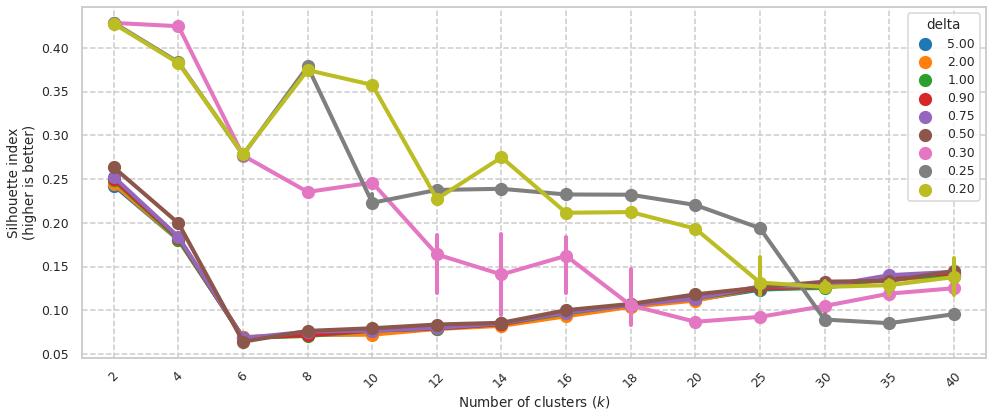

In [36]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="si_score", hue="delta")
    ax.set_ylabel("Silhouette index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

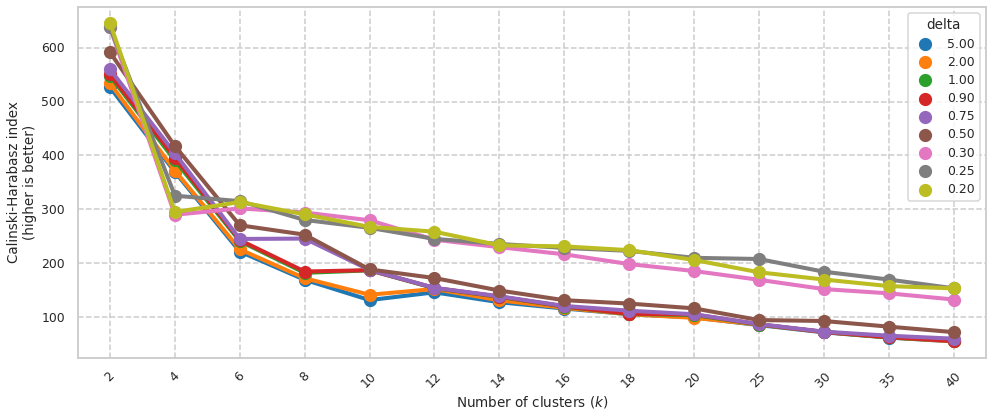

In [37]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score", hue="delta")
    ax.set_ylabel("Calinski-Harabasz index\n(higher is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

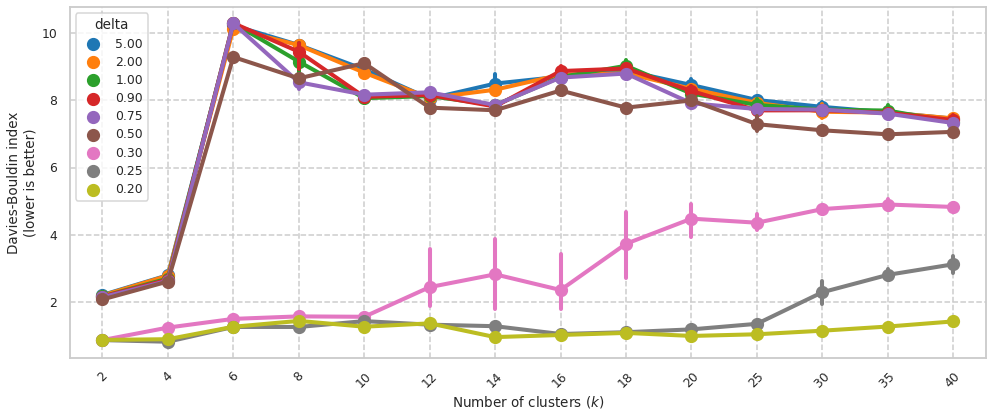

In [38]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="db_score", hue="delta")
    ax.set_ylabel("Davies-Bouldin index\n(lower is better)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()